# TASK 4 — Logistic Regression


### Import Libraries & Load the Dataset

In [2]:
import pandas as pd, numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv('data.csv')

In [3]:
print("shape:", df.shape)

shape: (569, 33)


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.029820,0.05738,0.01267,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.492,2.888,29.84,0.007256,0.026780,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.896,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.026,8.758,118.80,0.006399,0.043100,0.07845,0.02624,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.061580,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.004660,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


### Null Values in Dataset

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
binary_cols = [c for c in df.columns if df[c].dropna().nunique() == 2]
print("\nCandidate binary columns:", binary_cols)


Candidate binary columns: ['diagnosis']


In [8]:

# If there is exactly one obvious binary column, we'll use it
target = None
if len(binary_cols) == 1:
    target = binary_cols[0]
    print("Auto-selected target:", target)
else:
    # If multiple, show value counts to help pick one
    for c in binary_cols:
        print(c, "\n", df[c].value_counts(), "\n")
    # If none found, set target manually below
    print("If no suitable target shown above, set target variable manually, e.g.:")
    print("target = 'your_target_column_name'")

Auto-selected target: diagnosis


In [9]:
### define X and y

In [10]:
# If auto-detected target variable is None, set it manually:
# target = 'target_column_name'   # <- uncomment and edit if needed

assert 'target' in globals() or target is not None, "Set `target` variable before proceeding."

if 'target' in globals():
    target = globals()['target']

y = df[target].copy()
X = df.drop(columns=[target])

# Map target to 0/1 if it is non-numeric labels
if y.dtype == 'object' or not np.issubdtype(y.dtype, np.number):
    print("Target value counts:\n", y.value_counts())
    # convert to numeric 0/1
    y = pd.Categorical(y).codes
    print("Mapped target categories to numeric codes (0/1):", np.unique(y))

# Final checks
print("X shape:", X.shape, "y shape:", y.shape)
print("y unique values:", np.unique(y))


Target value counts:
 diagnosis
B    357
M    212
Name: count, dtype: int64
Mapped target categories to numeric codes (0/1): [0 1]
X shape: (569, 32) y shape: (569,)
y unique values: [0 1]


In [11]:
### Handle missing values & simple feature cleaning

In [12]:
# Option A: drop rows with many missing values
missing_pct = X.isnull().mean()
print("Missing percent per column:\n", missing_pct.sort_values(ascending=False).head(10))

# Strategy:
# - If column has > 50% missing: drop column
cols_drop = missing_pct[missing_pct > 0.5].index.tolist()
if cols_drop:
    print("Dropping columns with >50% missing:", cols_drop)
    X = X.drop(columns=cols_drop)

# - For remaining numeric cols: fill median
num_cols = X.select_dtypes(include=['number']).columns.tolist()
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# - For object (categorical) cols: fill mode
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
for c in cat_cols:
    X[c] = X[c].fillna(X[c].mode().iloc[0])

# Optional: drop identifier-like columns (if present)
id_like = [c for c in X.columns if c.lower() in ('id','userid','passengerid','index')]
if id_like:
    print("Dropping id-like columns:", id_like)
    X = X.drop(columns=id_like)

print("After cleaning, remaining columns:", X.columns.tolist())


Missing percent per column:
 Unnamed: 32                1.0
radius_mean                0.0
fractal_dimension_worst    0.0
symmetry_worst             0.0
concave points_worst       0.0
concavity_worst            0.0
compactness_worst          0.0
smoothness_worst           0.0
area_worst                 0.0
perimeter_worst            0.0
dtype: float64
Dropping columns with >50% missing: ['Unnamed: 32']
Dropping id-like columns: ['id']
After cleaning, remaining columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fracta

### Encode categorical features

In [14]:
# If many categories (high cardinality) you might want to limit dummies:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns to encode:", cat_cols)

# Simple robust approach: one-hot encode but drop first to avoid collinearity
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Encoded shape:", X_encoded.shape)


Categorical columns to encode: []
Encoded shape: (569, 30)


### Train-test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train class distribution:\n", pd.Series(y_train).value_counts(normalize=True))
print("Test class distribution:\n", pd.Series(y_test).value_counts(normalize=True))


Train: (455, 30) Test: (114, 30)
Train class distribution:
 0    0.626374
1    0.373626
Name: proportion, dtype: float64
Test class distribution:
 0    0.631579
1    0.368421
Name: proportion, dtype: float64


### Standardize numeric features

In [16]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns to scale:", num_cols)

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


Numeric columns to scale: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### Fit Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

print("Trained LogisticRegression. Intercept:", model.intercept_)


Trained LogisticRegression. Intercept: [-0.24300533]


### Predictions & probabilities

In [19]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]   # probability for the positive class


### Core evaluation metrics (confusion matrix, precision, recall, F1, accuracy)

Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
F1: 0.9512195121951219

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



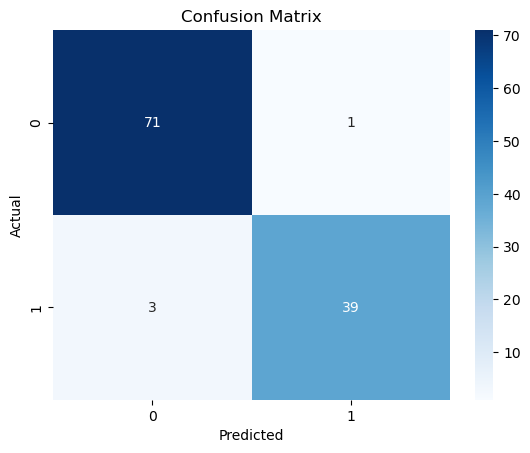

In [21]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Confusion matrix plot
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### ROC curve and AUC

ROC AUC: 0.996031746031746


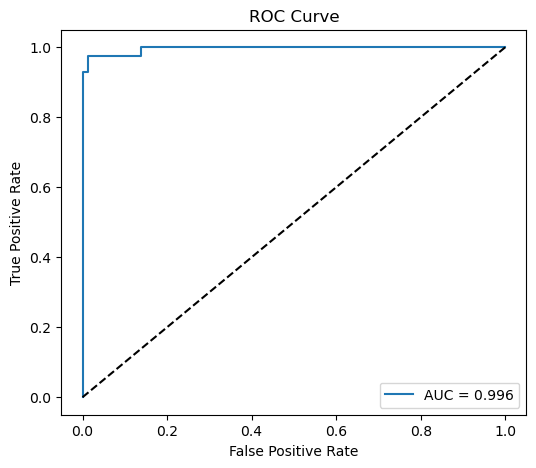

In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Precision-Recall curve (useful if classes imbalanced)

Average precision (AP): 0.994273631904294


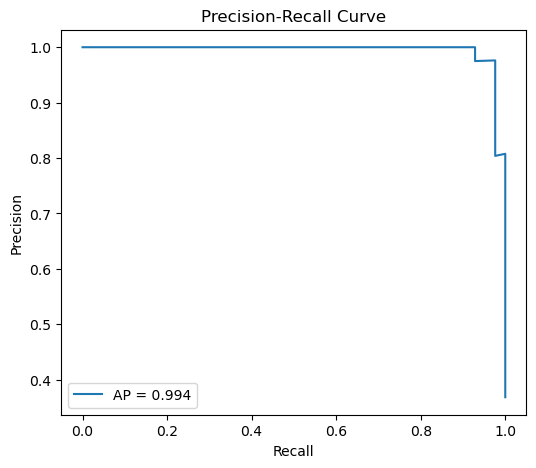

In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prec, rec, pr_thresh = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
print("Average precision (AP):", ap)

plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Threshold tuning (choose threshold other than 0.5)

In [26]:
def eval_threshold(th):
    y_pred_th = (y_prob >= th).astype(int)
    print(f"Threshold = {th:.2f}")
    print("Precision:", precision_score(y_test, y_pred_th))
    print("Recall:", recall_score(y_test, y_pred_th))
    print("F1:", f1_score(y_test, y_pred_th))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_th))
    print("----")

for th in [0.3, 0.4, 0.5, 0.6, 0.7]:
    eval_threshold(th)


Threshold = 0.30
Precision: 0.9761904761904762
Recall: 0.9761904761904762
F1: 0.9761904761904762
Confusion matrix:
 [[71  1]
 [ 1 41]]
----
Threshold = 0.40
Precision: 0.975609756097561
Recall: 0.9523809523809523
F1: 0.963855421686747
Confusion matrix:
 [[71  1]
 [ 2 40]]
----
Threshold = 0.50
Precision: 0.975
Recall: 0.9285714285714286
F1: 0.9512195121951219
Confusion matrix:
 [[71  1]
 [ 3 39]]
----
Threshold = 0.60
Precision: 1.0
Recall: 0.9047619047619048
F1: 0.95
Confusion matrix:
 [[72  0]
 [ 4 38]]
----
Threshold = 0.70
Precision: 1.0
Recall: 0.9047619047619048
F1: 0.95
Confusion matrix:
 [[72  0]
 [ 4 38]]
----


### Sigmoid function explanation & plot

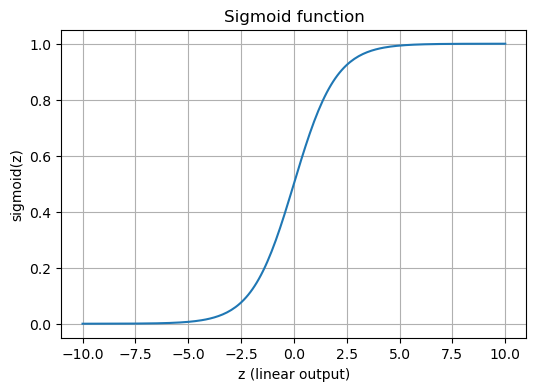

In [27]:
import numpy as np
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(6,4))
plt.plot(z, sigmoid)
plt.xlabel('z (linear output)')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid function')
plt.grid(True)
plt.show()


### Feature importance (coefficients) & interpretation

,feature,coef,abs_coef
21,texture_worst,1.434093,1.434093
10,radius_se,1.233325,1.233325
28,symmetry_worst,1.061264,1.061264
7,concave points_mean,0.952813,0.952813
26,concavity_worst,0.911406,0.911406
13,area_se,0.909029,0.909029
15,compactness_se,-0.906925,0.906925
23,area_worst,0.900477,0.900477
20,radius_worst,0.896968,0.896968
6,concavity_mean,0.782298,0.782298


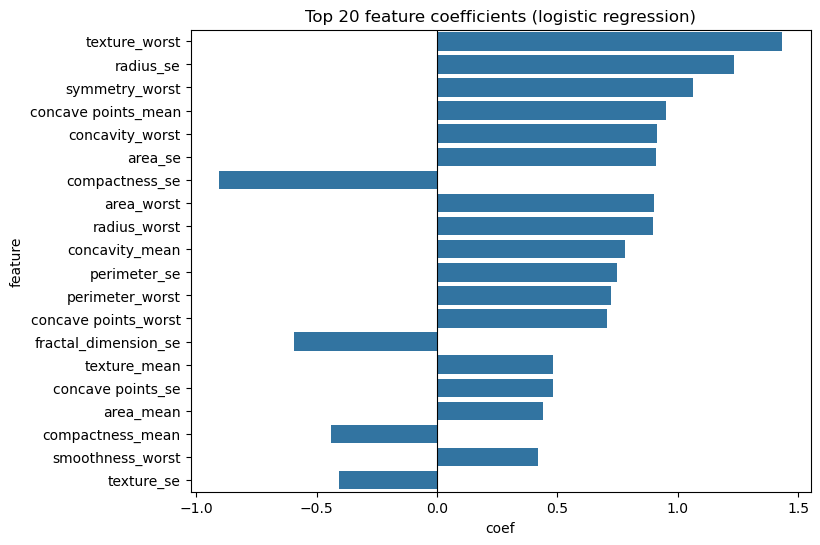

In [28]:
coef = model.coef_[0]
features = X_train.columns
coef_df = pd.DataFrame({'feature': features, 'coef': coef})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# display
display(coef_df.head(20))

# barplot
plt.figure(figsize=(8,6))
sns.barplot(x='coef', y='feature', data=coef_df.head(20))
plt.title('Top 20 feature coefficients (logistic regression)')
plt.axvline(0, color='k', linewidth=0.8)
plt.show()


### Checking assumptions / residuals (model diagnostics)

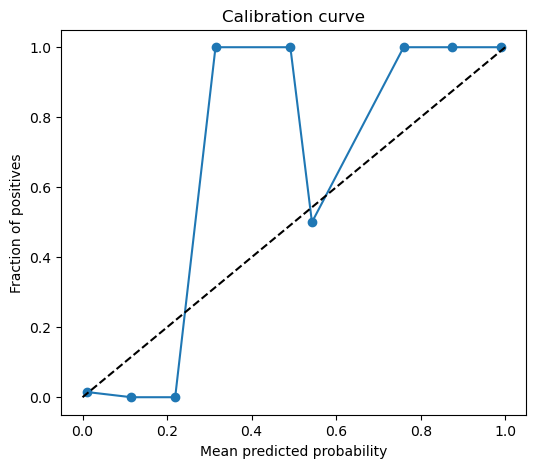

In [29]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve')
plt.show()


## Save model & scaler

In [30]:
import joblib
joblib.dump(model, 'logistic_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [31]:
#### stratify: keeps class distribution consistent in train/test.
Scale: coefficients comparable and solver converges faster.
Tune threshold: 0.5 may not match business cost tradeoffs (false positives vs false negatives).
check calibration: predicted probabilities should reflect true event rates if you rely on probabilities.
Interpreting coefficients: for scaled features, coefficient = change in log-odds per SD change. For one-hot features, coefficient = change in log-odds when category present vs baseline."""

'stratify: keeps class distribution consistent in train/test.\nScale: coefficients comparable and solver converges faster.\nTune threshold: 0.5 may not match business cost tradeoffs (false positives vs false negatives).\ncheck calibration: predicted probabilities should reflect true event rates if you rely on probabilities.\nInterpreting coefficients: for scaled features, coefficient = change in log-odds per SD change. For one-hot features, coefficient = change in log-odds when category present vs baseline.'